In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, gamma, gaussian_kde, uniform, binom

%matplotlib inline

In [2]:
# plt.hist(gamma.rvs(1, size=10000), bins=100);

In [3]:
# plt.hist(gamma.rvs(1, size=(100, 100000)).mean(axis=0), bins=40);

WHat I'm testing:
 - that 100% bootstrap samples from an observed sample can be used to estimate a distribution over the population mean
 - the suitability of this approach can be verified by calculating the percentile of the true mean within the distribution over many repeats of the experiment
 - if this percentile is uniformly distributed between 0, 1 then it's valid
 
Steps:
 - Fix mean at 1.0 and choose non-normal distribution e.g. exponential (but should be able to swap it out)
 - One experiment
     - Create a sample of size N
     - Generate B bootstrap samples from this sample and take their mean
     - Compute the percentile of the true mean within the bootstrap sample means
     - This percentile is the output
 - Conduct many experiments
 - Compute the distribution of the outputs

In [4]:
def do_experiment(dist, N, B):
    true_mean = dist.mean()
    sample = dist.rvs(size=N)
    bootstrap_means = np.random.choice(sample, size=(N, B)).mean(axis=0)
    true_percentile = (bootstrap_means < true_mean).mean()
    return true_percentile

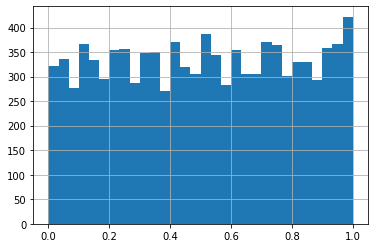

In [5]:
pd.Series([do_experiment(gamma(1), 500, 200) for i in range(10000)]).hist(bins=30);

In [6]:
class MyDist:
    
    @staticmethod
    def rvs(size):
        locs = np.random.choice([-1, 1], size=size)
        return gamma.rvs(1, loc=locs)
    
    @staticmethod
    def mean():
        return 1.0

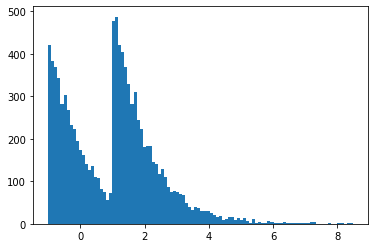

In [7]:
plt.hist(MyDist.rvs(10000), bins=100);

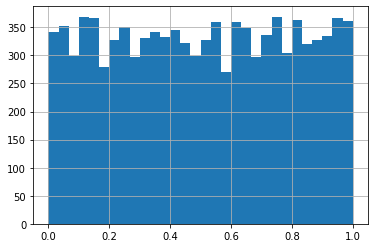

In [8]:
pd.Series([do_experiment(MyDist, 500, 200) for i in range(10000)]).hist(bins=30);